# Size of the largest unchar clade

For each uncharacterized leaf, get the number of leaves of largest possible clade it is part of and consists only of uncharacterized leaves.

In [1]:
from ete3 import Tree

In [4]:
import pandas as pd

In [2]:
tree = Tree('all_filtered_5_unique_no_stop_50_with_char_fastest.tree')

In [5]:
char_info_df = pd.read_csv('nodes_char_info.csv', index_col=0)

In [7]:
char_info_dict = char_info_df.set_index('source').to_dict(orient='index')

In [28]:
characterized_leaves_ids = set(char_info_df[char_info_df['characterized']==1]['source'].tolist())

In [29]:
uncharacterized_leaves_ids = set(char_info_df[char_info_df['characterized']==0]['source'].tolist())

In [16]:
leaf1 = tree.get_leaves()[0]

In [17]:
leaf1

Tree node 'uniprot_167215' (0x1c7dc33f8b)

In [24]:
leaf1.get_ancestors()

[Tree node '' (0x1c7dc33f64),
 Tree node '' (0x1c7dc33ffd),
 Tree node '' (0x1c7e0d15ae)]

In [38]:
def get_largest_unchar_clade_size(leaf, characterized_leaves_ids=characterized_leaves_ids):
    largest_unchar_clade_size = 1
    for ancestor in leaf.iter_ancestors():
        leaves = set(ancestor.get_leaf_names())
        intersection = leaves.intersection(characterized_leaves_ids)
        if len(intersection) > 0:
            return largest_unchar_clade_size
        largest_unchar_clade_size = len(leaves)

In [39]:
sizes = dict()
for leaf in tree.get_leaves():
    sizes[leaf.name] = get_largest_unchar_clade_size(leaf)

In [46]:
sizes_df = pd.DataFrame.from_dict(sizes, orient='index', columns=['size'])

<Axes: ylabel='Frequency'>

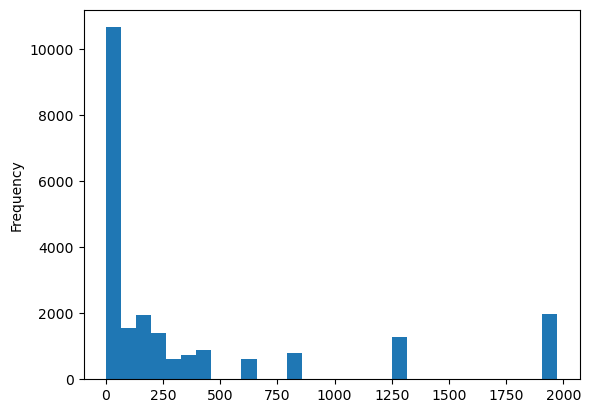

In [50]:
sizes_df['size'].plot.hist(bins=30)

In [52]:
sizes_df.to_csv('largest_unchar_clade_sizes.csv')